In [16]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [31]:
# Load and preprocess validation(test) data

valid_data_gen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_data_gen.flow_from_directory(
        'dataset/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 911 images belonging to 2 classes.


In [32]:
# Load and preprocess train data

# Normalize intensity of images to make it in the range [0,1] since 255 is the max (white).
train_data_gen = ImageDataGenerator(rescale=1./255) 
# Load data, resizes them to 150x150 pixels, batches them, and assigns binary labels (0 for rotten, 1 for fresh)
train_generator = train_data_gen.flow_from_directory(
        'dataset/train', 
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 3805 images belonging to 2 classes.


In [33]:
# define CNN 

# step 1 - convolutional layer and max pooling layers to extract features
# extracts low-level features
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))

# adds a 2x2 max pooling layer to downsample the feature maps from the conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# extracting higher-level features built on top of the low-level features from the previous layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# another 2x2 max pooling layer.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 2 - flattening the output to 1D
# flatten to 1d vector
model.add(Flatten())
model.add(Dense(128, activation='relu'))


# step 3 - sigmoid output for classification
model.add(Dense(1, activation='sigmoid'))


In [39]:
# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_generator, 
          steps_per_epoch=len(train_generator),
          validation_data=valid_generator,
          validation_steps=len(valid_generator),
          epochs=10)
# Save model 
model.save('models/banana_ripeness_model.h5')
# Evaluate model performance
test_loss, test_acc = model.evaluate(valid_generator)
print('Test accuracy:', test_acc)

Epoch 1/10
119/119 [==============================] - 101s 818ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.0268 - val_accuracy: 0.9934
Epoch 2/10
119/119 [==============================] - 85s 708ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 3/10
119/119 [==============================] - 92s 769ms/step - loss: 2.3844e-04 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9978
Epoch 4/10
119/119 [==============================] - 88s 730ms/step - loss: 3.9060e-05 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9978
Epoch 5/10
119/119 [==============================] - 83s 694ms/step - loss: 2.8069e-05 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 6/10
119/119 [==============================] - 84s 707ms/step - loss: 1.1556e-05 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9978
Epoch 7/10
119/119 [==============================] - 83s 695ms/step - loss: 7.2712e-06 - accuracy: 1.0000 - val_

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 14s 470ms/step - loss: 0.0080 - accuracy: 0.9978
Test accuracy: 0.997804582118988


29/29 [==============================] - 15s 503ms/step - loss: 0.0080 - accuracy: 0.9978
Test accuracy: 0.997804582118988
29/29 [==============================] - 14s 458ms/step
Actual: 0 Predicted: 0


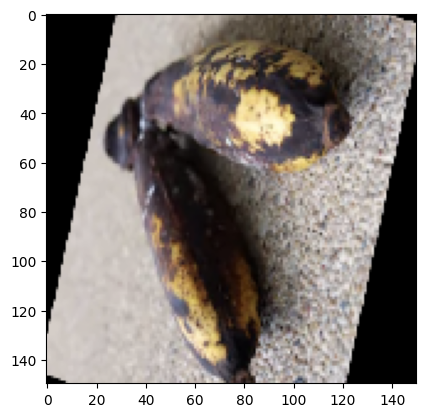

Actual: 0 Predicted: 0


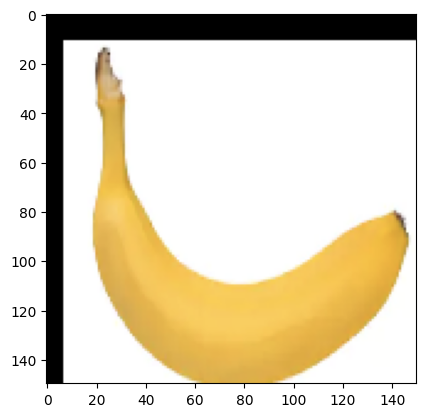

Actual: 0 Predicted: 1


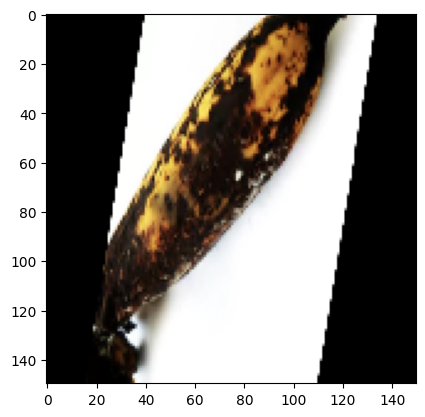

Actual: 0 Predicted: 1


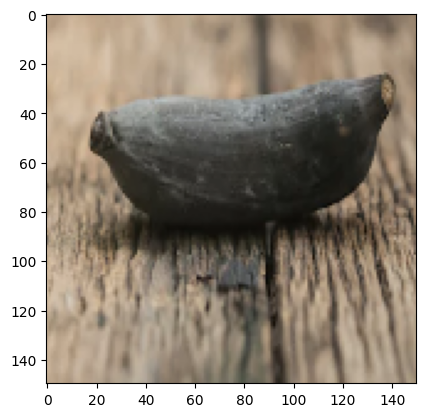

Actual: 0 Predicted: 0


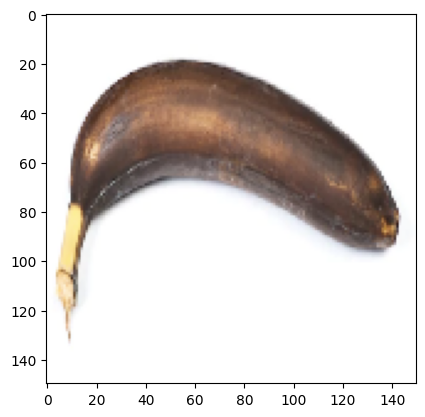

Actual: 0 Predicted: 1


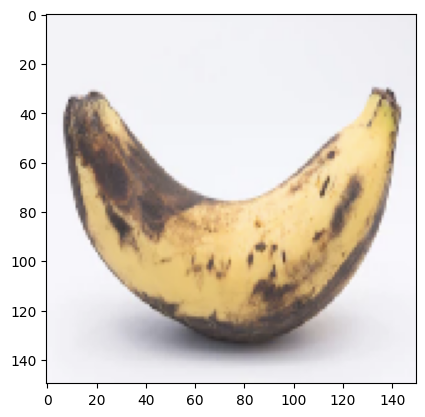

Actual: 0 Predicted: 1


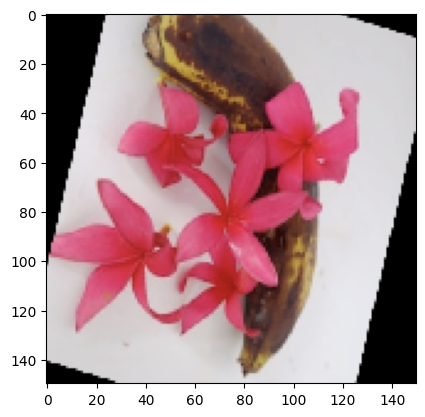

Actual: 0 Predicted: 0


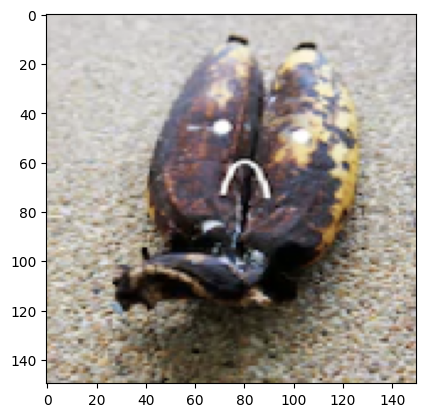

Actual: 0 Predicted: 0


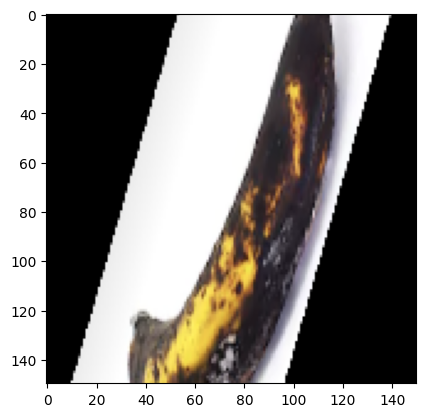

Actual: 0 Predicted: 1


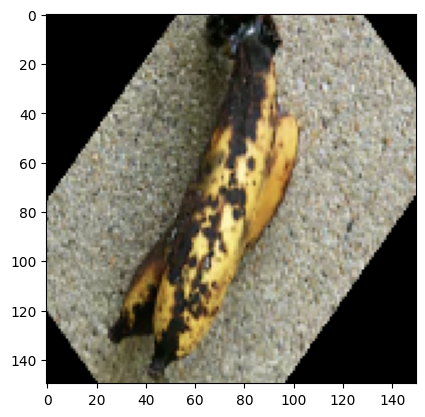

In [42]:
# Load the trained model   
from keras.models import load_model

model = load_model('models/banana_ripeness_model.h5')

# Make predictions on test set
test_loss, test_acc = model.evaluate(valid_generator)
print('Test accuracy:', test_acc)  

predictions = model.predict(valid_generator)

# Decode predictions
predicted_classes = [1 if p>0.5 else 0 for p in predictions]

# Evaluate performance
import matplotlib.pyplot as plt

for i in range(10):
    img = valid_generator.next()[0][0] 
    actual = valid_generator.classes[i]
    predicted = predicted_classes[i]
    print('Actual:', actual, 'Predicted:', predicted) 
    if 
    plt.imshow(img)
    plt.show()

'/Users/lulujiang/Documents/GitHub/BostonHacks_Project'